## 2 dimensional Schroedinger's equation solutions

In [1]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import eigsh

import matplotlib.pyplot as plt
from matplotlib import animation

In [7]:
Rbenchmark = 0.1
Vbenchmark = 1e1
mass = 1

def V_circular_well(x, y, V0=Vbenchmark, R=Rbenchmark):
    return np.where( np.sqrt(x**2 + y**2) < R, V0, 0)

def V_wall(x, y, V0=Vbenchmark, x0=0):
    return np.where(x>x0, V0, 0)

In [8]:
def solve_Hamiltonian(V, n_levels=30, npoints=100, mass=1, **kwargs):
    
    # spatial grids
    xmin, xmax = -1, 1
    ymin, ymax = -1, 1
    X, Y = np.meshgrid(np.linspace(xmin,xmax, npoints), np.linspace(ymin,ymax, npoints))
    dx = 2/npoints
    dy = 2/npoints

    diag = np.ones([npoints])
    diags = np.array([diag, -2*diag, diag])
    D = sparse.spdiags(diags, np.array([-1,0,1]), npoints, npoints)
    T = -1/(2*mass) * sparse.kronsum(D,D)
    U = sparse.diags(V(X,Y, **kwargs).reshape(npoints**2), (0))
    H = T + U
    en, psi = eigsh(H, k=n_levels, which='SM')

    # NOTE: CHECK THIS! Is this transpose + reshaping operation swapping the x and y axes?
    psi = psi.T.reshape(([n_levels, npoints, npoints])) 
    inds = np.argsort(en)
    en = en[inds]
    psi = psi[inds]
    
    return X, Y, en, psi

In [4]:
X, Y, E_circ_p, psi_circ_p = solve_Hamiltonian(V_circular_well, R=0.1, V0=1e-8)
X, Y, E_circ_m, psi_circ_m = solve_Hamiltonian(V_circular_well, R=0.1, V0=-1e-8)

In [6]:
X, Y, E_wall_p, psi_wall_p = solve_Hamiltonian(V_wall, V0=1e-4, x0=0.1, npoints=50)
X, Y, E_wall_m, psi_wall_m = solve_Hamiltonian(V_wall, V0=-1e-4, x0=0.1, npoints=50)

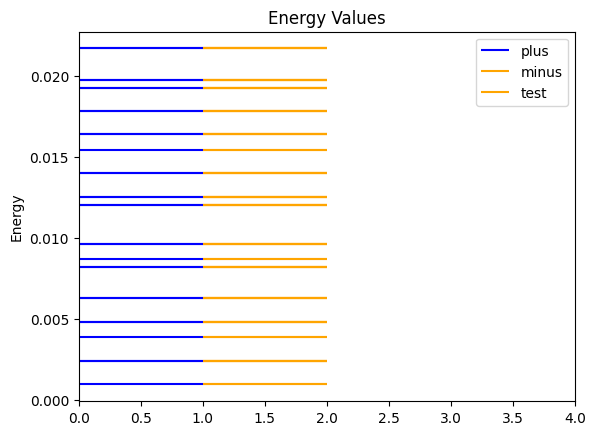

In [11]:
fig, ax = plt.subplots()

ax.hlines(E_circ_p, 0, 1, colors='blue', label='plus')
ax.hlines(E_circ_m, 1, 2, colors='orange', label='minus')

ax.legend()
ax.set_xlim(0, 4)
ax.set_ylabel('Energy')
ax.set_xlabel('')
ax.set_title('Energy Values')
fig.savefig('plots/energy_levels.png', dpi=300)

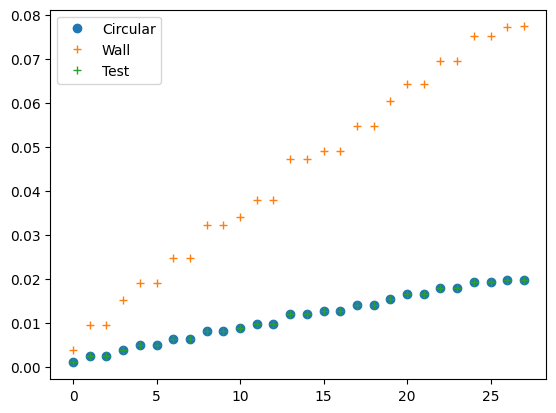

In [13]:
plt.plot(E_circ_p[:-2], 'o', label='Circular')
plt.plot(E_wall_p[:-2], '+', label='Wall')
plt.plot(E_test[:-2], '+', label='Test')
plt.legend()

TypeError: Shapes of x (100, 100) and z (50, 50) do not match

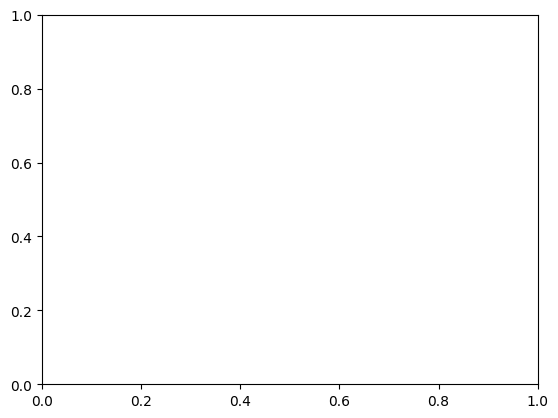

In [14]:
fig = plt.figure()
ax = plt.axes()

i=0
# Asy =  (np.abs(psi_circ)**2 - np.abs(psi_circ_m)**2) / ( np.abs(psi_circ)**2 + np.abs(psi_circ_m)**2)
cs = ax.contour(X, Y, psi_wall_m[i]**2, levels=20, linewidth=0.5)
cs = ax.contour(X, Y, psi_wall_p[i]**2, levels=20, linewidth=0.5, linestyles='dashed')
# ax.clabel(cs, inline=True, fontsize=8)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_26547/369733971.py:7: UserWarning: The following kwargs were not used by contour: 'linewidth'
  _ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)


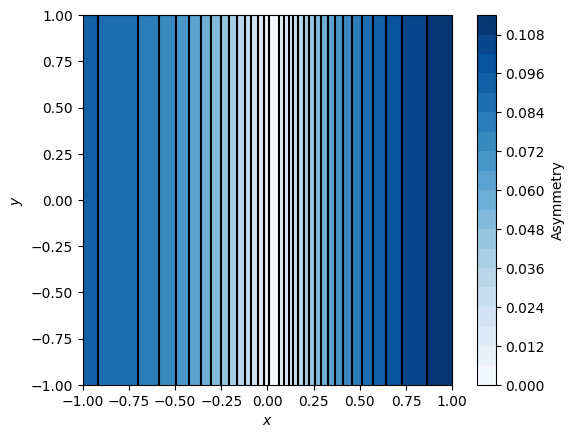

In [23]:
from matplotlib.patches import Circle

fig = plt.figure()
ax = plt.axes()

Asy =  np.abs((np.abs(psi_wall_p)**2 - np.abs(psi_wall_m)**2) / ( np.abs(psi_wall_p)**2 + np.abs(psi_wall_m)**2))
_ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)
cs = ax.contourf(X, Y, Asy[0], levels=20, cmap='Blues')
cbar = fig.colorbar(cs)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
cbar.set_label('Asymmetry')
ax.set_aspect(r'equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Asymmetry at y = 0')

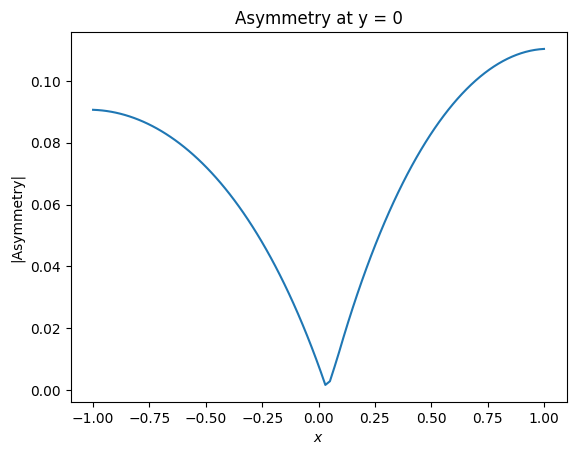

In [25]:
plt.plot(X[99,:], Asy[0,99,:], label='Wall')
plt.xlabel(r'$x$')
plt.ylabel(r'|Asymmetry|')
plt.title(f'Asymmetry at y = 0')

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_31498/3108437284.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth'
  _ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)


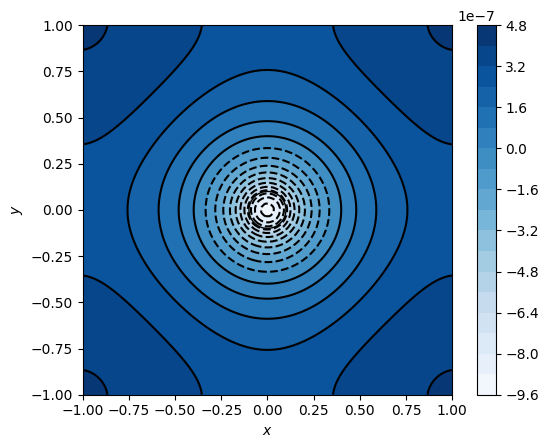

In [15]:
from matplotlib.patches import Circle

fig = plt.figure()
ax = plt.axes()

circle = Circle((0, 0), Rbenchmark, edgecolor='black', linewidth=1, fill=False, zorder=10)
ax.add_patch(circle)

Asy =  (np.abs(psi_circ_p)**2 - np.abs(psi_circ_m)**2) / ( np.abs(psi_circ_p)**2 + np.abs(psi_circ_m)**2)
_ = ax.contour(X, Y, Asy[0], levels=20, colors='black', linewidth=0.1)
cs = ax.contourf(X, Y, Asy[0], levels=20, cmap='Blues')
cbar = fig.colorbar(cs)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')

In [20]:
def V_test_CAP(x, y):
    return - np.where(np.sqrt(x**2 + y**2) > 0.8, 1, 0)

X, Y, E_test, psi_test = solve_Hamiltonian(V_test_CAP, npoints=20, n_levels=5, mass=1)

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_31498/1783535094.py:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  _ = ax.contour(X, Y, psi_test[0], levels=20, colors='black', linewidth=0.1)


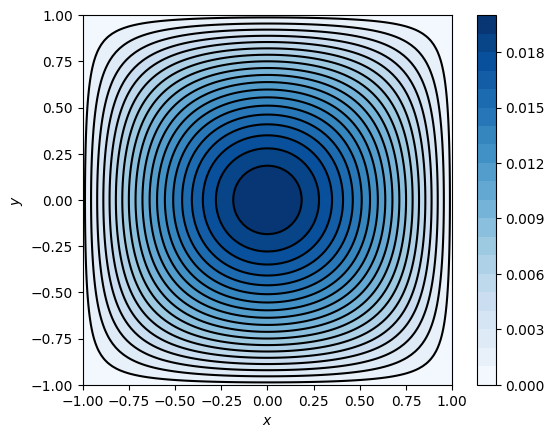

In [18]:
fig = plt.figure()
ax = plt.axes()

_ = ax.contour(X, Y, psi_test[0], levels=20, colors='black', linewidth=0.1)
cs = ax.contourf(X, Y, psi_test[0], levels=20, cmap='Blues')
cbar = fig.colorbar(cs)

# Plot the surface
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

# ax.set_xlim(-0.2,0.2)
# ax.set_ylim(-0.2,0.2)

# fig.savefig(f'plots/wavefunctions_comparison_{i}.png', dpi=300, bbox_inches='tight')